<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning</h1><h2>Assignment 2</h2><h3>
    </tr>
</table>

#### Cesar Chen Peralta Jr II / S10205582

### 1. [HR Analytics](#part1)
   - [1.1 Load and Sample the data](#part1.1)
   - [1.2 Build the Model(s)](#part1.2)
       - [1.2.1 Logistic Regression](#part1.2.1)
       - [1.2.2 XGBoost Classifier](#part1.2.2)
       - [1.2.3 Random Forest Classifier](#part1.2.3)
       - [1.2.4 Support Vector Classifier](#part1.2.4)   
   - [1.3 Evaluate and Improve the Model(s)](#part1.3)
       - [1.3.1 Logistic Regression](#part1.3.1)
       - [1.3.2 XGBoost Classifier](#part1.3.2)
       - [1.3.3 Random Forest Classifier](#part1.3.3)
       - [1.3.4 Support Vector Classifier](#part1.3.4)
       - [1.3.5 Voting Classifier](#part1.3.5)
   
### 2. [Airbnb](#part2)
   - [2.1 Load and Sample the data](#part2.1)
   - [2.2 Build the Model(s)](#part2.2)
       - [2.2.1 Linear Regression](#part2.2.1)
       - [2.2.2 MLP Regressor](#part2.2.2)
       - [2.2.3 XGBoost Regressor](#part2.2.3)
       - [2.2.4 Random Forest Regressor](#part2.2.4)
   - [2.3 Evaluate and Improve the Model(s)](#part2.3)
       - [2.3.1 Linear Regression](#part2.3.1)
       - [2.3.2 MLP Regressor](#part2.3.2)
       - [2.3.3 XGBoost Regressor](#part2.3.3)
       - [2.3.4 Random Forest Regressor](#part2.3.4)

In [205]:
# import the required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from math import sqrt
import statsmodels.api as sm
from xgboost import XGBClassifier, XGBRegressor, XGBRegressor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. HR Analytics <a id="part1"></a>

### 1.1 Load and Sample the data <a id="part1.1"></a>

In [3]:
# Load dataset into a DataFrame
df_hr = pd.read_csv('hr_data_new.csv')

# Create a copy of the DataFrame
df1 = df_hr.copy()

# Show overview of the dataset
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,9,7,3,0,2,1,3.555348,5,1.098612,1,0,0.155172,1
1,9,28,3,1,2,1,3.496508,5,1.791759,1,0,0.172414,1
2,9,4,2,1,3,1,3.912023,4,2.833213,1,0,0.103448,1
3,4,22,3,1,3,1,3.295837,3,0.000000,1,1,0.293103,1
4,9,22,3,1,2,1,3.295837,3,0.000000,0,0,0.344828,1


In [4]:
# Set "is_promoted" as the target/model output and the other features as model inputs
y_data = df1['is_promoted']
X_data = df1.drop(['is_promoted'], axis=1)

In [5]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=2)

### 1.2 Build the Model(s) <a id="part1.2"></a>

#### Logistic Regression <a id="part1.2.1"></a>

In [7]:
# Create the model "lg"
lg = LogisticRegression(random_state=2) 
# Fit the model to the training set
lg.fit(X_train,y_train)

LogisticRegression(random_state=2)

#### XGBoost Classifier<a id="part1.2.2"></a>

In [8]:
# Create the model "xgb"
xgb = XGBClassifier(random_state=2, use_label_encoder=False, eval_metric='logloss')
# Fit the model to the training set
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

#### Random Forest Classifier<a id="part1.2.3"></a>

In [123]:
# Create the model "rf"
rf = RandomForestClassifier(random_state=2)
# Fit the model to the training set
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

#### Support Vector Classifier<a id="part1.2.4"></a>

In [125]:
# Create the model "svc"
svc = SVC(random_state=2)
# Fit the model to the training set
svc.fit(X_train,y_train)

SVC(random_state=2)

### 1.3 Evaluate and Improve the Model(s) <a id="part1.3"></a>

#### Logistic Regression <a id="part1.3.1"></a>

In [10]:
results  = cross_validate(lg, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.73620782 0.73343152 0.73597536 0.73570759 0.73169099]
test_score:  [0.72698073 0.73379754 0.72469202 0.72576326 0.75093733]
cross val training accuracy is: 0.7346026565221591
cross val testing accuracy is: 0.732434174533685


In [223]:
# Create the model "lg2" using statsmodel.api
lg2 = sm.Logit(y_train, X_train).fit()
# Print out the Model Summary
lg2.summary()

Optimization terminated successfully.
         Current function value: 0.528415
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6523
Method:                           MLE   Df Model:                           11
Date:                Thu, 03 Feb 2022   Pseudo R-squ.:                  0.2376
Time:                        23:35:07   Log-Likelihood:                -3453.2
converged:                       True   LL-Null:                       -4529.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
department               0.2287      0.018     12.645      0.000       0.193       0.264
region                  -0.0101      0.003     -3.326      0.001      -0.016      -0.004
education               -0.2223      0.057     -3.917      0.000      -0.334      -0.111
gender                  -0.0174      0.064     -0.272      0.786      -0.143       0.108
recruitment_channel     -0.0221      0.053     -0.415      0.678      -0.127       0.082
no_of_trainings         -0.1798      0.054     -3.354      0.001      -0.285      -0.075
age                     -1.2714      0.082    -15.449      0.000      -1.433      -1.110
previous_year_rating     0.3528      0.027     13.163      0.000       0.300       0.405
length_of_service        0.1524      0.046      3.339      0.001       0.063       0.242
KPIs_met >80%            1.6363      0.062     26.515      0.000       1.515       1.757
awards_won?              2.0687      0.171     12.073      0.000       1.733       2.405
avg_training_score       3.2610      0.148     22.041      0.000       2.971       3.551
========================================================================================
"""

In [54]:
# Set "is_promoted" as the target/model output and the other features as model inputs
X_data2 = df1.drop(['is_promoted','gender','recruitment_channel'], axis=1)

In [55]:
# Split the data into training and testing data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=0.3, random_state=2)

In [227]:
lg = LogisticRegression(random_state=2)

param_grid = { "C" : [1,10,100,1000],
            "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

gs = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data2, y_data2)
print(gs.best_score_)
print(gs.best_params_)

0.7341478100996801
{'C': 1, 'solver': 'lbfgs'}


In [229]:
lg = LogisticRegression(random_state=2, solver='lbfgs')

param_grid = { "C" : [0.001,0.01,0.1,1]}

gs = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data2, y_data2)
print(gs.best_score_)
print(gs.best_params_)

0.7432524667704261
{'C': 0.01}


In [57]:
lg = LogisticRegression(random_state=2, solver='lbfgs')

param_grid = { "C" : [0.008,0.009,0.01,0.02,0.03,0.04]}

gs = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data2, y_data2)
print(gs.best_score_)
print(gs.best_params_)

0.7438953238313593
{'C': 0.008}


In [58]:
lg = LogisticRegression(random_state=2, solver='lbfgs')

param_grid = { "C" : [0.003,0.004,0.005,0.006,0.007,0.008]}

gs = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data2, y_data2)
print(gs.best_score_)
print(gs.best_params_)

0.7443235893559845
{'C': 0.007}


In [59]:
lg = LogisticRegression(solver='lbfgs', C=0.007, random_state=2)

# Fit the model to the training set
lg.fit(X_train2,y_train2)

results  = cross_validate(lg, X_data2, y_data2, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.74692019 0.74360691 0.74347302 0.74441023 0.74146472]
test_score:  [0.73929336 0.75040171 0.73808249 0.73754687 0.75736476]
cross val training accuracy is: 0.7439750145988171
cross val testing accuracy is: 0.744537836811796


#### XGBoost Classifier<a id="part1.3.2"></a>

In [9]:
results  = cross_validate(xgb, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.92889663 0.92422011 0.92984335 0.92796894 0.9323872 ]
test_score:  [0.79978587 0.80128548 0.79325121 0.80289234 0.8018211 ]
cross val training accuracy is: 0.9286632453240221
cross val testing accuracy is: 0.7998072002284694


In [50]:
xgbc = XGBClassifier(random_state=2, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)

param_grid = { "n_estimators" : [200,400,700],
            "max_depth": [1,5,10,15],
            "min_child_weight": [1,5,10],
            "gamma": [10,1,0.1],
            "subsample": [0.4,0.6,0.8],
            "colsample_bytree": [0.4,0.6,0.8],
             "learning_rate": [0.01,0.1]}

gs = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8189809712016093
{'colsample_bytree': 0.6, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 700, 'subsample': 0.6}


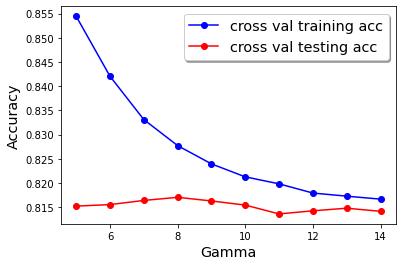

In [60]:
gamma_range = range(5,15)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in gamma_range:
    xgbc = XGBClassifier(gamma=d, subsample=0.6, max_depth=15, min_child_weight=1, 
                         colsample_bytree=0.6, learning_rate=0.1, random_state=2, use_label_encoder=False, 
                         eval_metric='logloss')
    xgbc.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgb.predict(X_train), y_train))
    test_acc.append(accuracy_score(xgb.predict(X_test), y_test))
    
    results  = cross_validate(xgbc, X_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))

plt.plot(gamma_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(gamma_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('Gamma', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [95]:
xgbc = XGBClassifier(n_estimators=490, max_depth=12, colsample_bytree=0.7, subsample=0.55, min_child_weight=1, learning_rate=0.1, random_state=2, use_label_encoder=False, eval_metric='logloss')

param_grid = { "gamma" : [5,6,7,8,9,10,11,12,13,14,15]}

gs = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8187662076250533
{'gamma': 9}


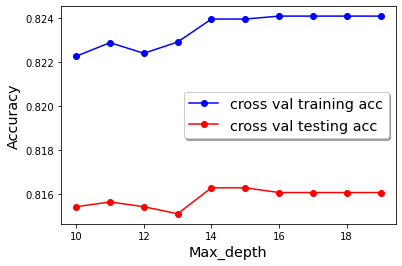

In [62]:
depth_range = range(10,20)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    xgbc = XGBClassifier(max_depth=d, gamma=9, subsample=0.6, min_child_weight=1, colsample_bytree=0.6, learning_rate=0.1, 
                         random_state=2, use_label_encoder=False, eval_metric='logloss')
    xgbc.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgbc.predict(X_train), y_train))
    test_acc.append(accuracy_score(xgbc.predict(X_test), y_test))
    
    results  = cross_validate(xgbc, X_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))

plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('Max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [94]:
xgbc = XGBClassifier(n_estimators=490, gamma=9, colsample_bytree=0.7, subsample=0.55, min_child_weight=1, learning_rate=0.1, random_state=2, use_label_encoder=False, eval_metric='logloss')

param_grid = { "max_depth" : [10,11,12,13,14,15,16,17,18]}

gs = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8187662076250533
{'max_depth': 12}


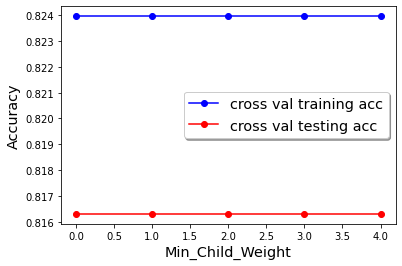

In [71]:
weight_range = range(0, 5)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in weight_range:
    xgbc = XGBClassifier(weight_range=d, gamma=9, subsample=0.6, max_depth=12, min_child_weight=1, colsample_bytree=0.6, 
                         learning_rate=0.1, random_state=2, use_label_encoder=False, eval_metric='logloss')
    xgbc.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgbc.predict(X_train), y_train))
    test_acc.append(accuracy_score(xgbc.predict(X_test), y_test))
    
    results  = cross_validate(xgbc, X_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    
plt.plot(weight_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(weight_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('Min_child_weight', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

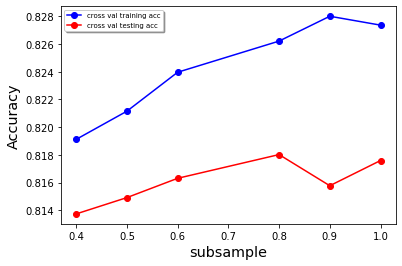

In [73]:
subsample_range = [0.4,0.5,0.6,0.8,0.9,1]

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in subsample_range:
    xgb = XGBClassifier(subsample=d, gamma=9, max_depth=15, min_child_weight=1, colsample_bytree=0.6, 
                        learning_rate=0.1, random_state=2, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgb.predict(X_train), y_train))
    test_acc.append(accuracy_score(xgb.predict(X_test), y_test))
    
    results  = cross_validate(xgb, X_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))

plt.plot(subsample_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(subsample_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('subsample', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-small')
plt.show()

In [93]:
xgb = XGBClassifier(n_estimators=490, gamma=9, colsample_bytree=0.7, max_depth=15, min_child_weight=1, learning_rate=0.1, random_state=2, use_label_encoder=False, eval_metric='logloss')

param_grid = { "subsample" : [0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]}

gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8185518454757428
{'subsample': 0.55}


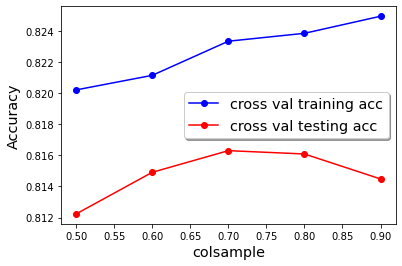

In [78]:
colsample_range = np.arange(0.5,1,0.1)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in colsample_range:
    xgb = XGBClassifier(colsample_bytree=d, gamma=9, subsample=0.55, max_depth=12, min_child_weight=1, 
                        learning_rate=0.1, random_state=2, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgb.predict(X_train), y_train))
    test_acc.append(accuracy_score(xgb.predict(X_test), y_test))
    
    results  = cross_validate(xgb, X_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))

plt.plot(colsample_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(colsample_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('colsample_bytree', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [92]:
xgb = XGBClassifier(n_estimators=490, gamma=9, subsample=0.6, max_depth=15, min_child_weight=1, learning_rate=0.1, random_state=2, use_label_encoder=False, eval_metric='logloss')

param_grid = { "colsample_bytree" : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}

gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8179101353497981
{'colsample_bytree': 0.7}


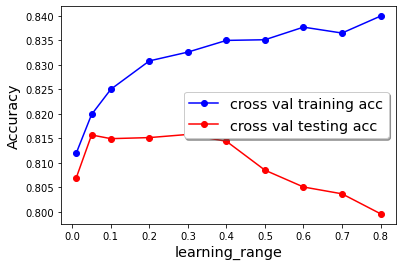

In [81]:
learning_range = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in learning_range:
    xgb = XGBClassifier(learning_rate=d, gamma=9, subsample=0.6, max_depth=15, min_child_weight=1, 
                        colsample_bytree=0.7, random_state=2, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgb.predict(X_train), y_train))
    test_acc.append(accuracy_score(xgb.predict(X_test), y_test))
    
    results  = cross_validate(xgb, X_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
plt.plot(learning_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(learning_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('learning_rate', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [91]:
xgb = XGBClassifier(n_estimators=490, gamma=9, subsample=0.6, max_depth=15, min_child_weight=1, colsample_bytree=0.6, random_state=2, use_label_encoder=False, eval_metric='logloss')

param_grid = { "learning_rate" : [0.0,0.05,0.1,0.15,0.2,0.25,0.30,0.35,0.4,0.45,0.5,0,55,0.6,0.65,0.7,0.75,0.8]}

gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8179095618823038
{'learning_rate': 0.1}


In [84]:
xgb = XGBClassifier(gamma=9, subsample=0.6, max_depth=12, min_child_weight=1, colsample_bytree=0.6, learning_rate=0.1, 
                    random_state=2, use_label_encoder=False, eval_metric='logloss')

param_grid = { "n_estimators" : [400,450,500,550,600,650,700,750,800,850,900,950,1000]}


gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8178024381543981
{'n_estimators': 500}


In [85]:
xgb = XGBClassifier(gamma=9, subsample=0.6, max_depth=12, min_child_weight=1, colsample_bytree=0.6, learning_rate=0.1, 
                    random_state=2, use_label_encoder=False, eval_metric='logloss')

param_grid = { "n_estimators" : [470,480,490,500,510,520,530]}


gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8179095618823038
{'n_estimators': 490}


In [87]:
n_range = range(480,500)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in n_range:
    xgb = XGBClassifier(n_estimator=d, gamma=9, subsample=0.6, max_depth=15, min_child_weight=1, colsample_bytree=0.6, learning_rate=0.1, random_state=2, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(xgb.predict(X_train), y_train))
    test_acc.append(accuracy_score(xgb.predict(X_test), y_test))
    
    results  = cross_validate(xgb, X_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))

[03:10:32] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:10:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:10:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

[03:10:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:10:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:10:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

[03:11:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:11:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:11:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

[03:11:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:11:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:11:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

[03:11:47] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:11:47] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:11:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

[03:12:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:12:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:12:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

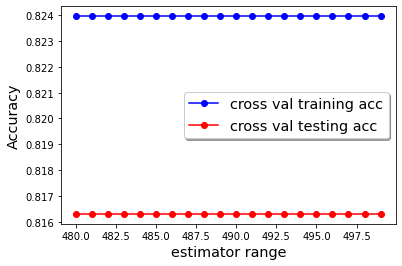

In [88]:
plt.plot(n_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(n_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('n_estimators', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [9]:
xgb = XGBClassifier(n_estimators=490, gamma=9, max_depth=12, colsample_bytree=0.7, subsample=0.55, min_child_weight=1, 
                    learning_rate=0.1, random_state=2, use_label_encoder=False, eval_metric='logloss')

xgb.fit(X_train,y_train)
results  = cross_validate(xgb, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)

print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.83543117 0.83639041 0.83424823 0.83304325 0.83063328]
test_score:  [0.81745182 0.82056776 0.81842528 0.81788966 0.81949652]
cross val training accuracy is: 0.8339492684743073
cross val testing accuracy is: 0.8187662076250533


In [10]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(xgb.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
9,KPIs_met >80%,0.309671
7,previous_year_rating,0.139951
10,awards_won?,0.138747
11,avg_training_score,0.107674
0,department,0.086689
3,gender,0.040251
8,length_of_service,0.035413
4,recruitment_channel,0.032847
6,age,0.030744
1,region,0.029888


In [33]:
X_data3 = df_hr.drop(['is_promoted','education','no_of_trainings','region'], axis = 1)

In [34]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_data3, y_data, test_size=0.3, random_state=2)

In [16]:
xgb = XGBClassifier(n_estimators=490, gamma=9, max_depth=12, colsample_bytree=0.7, subsample=0.55, min_child_weight=1, 
                    learning_rate=0.1, random_state=2, use_label_encoder=False, eval_metric='logloss')

xgb.fit(X_train3,y_train3)
results  = cross_validate(xgb, X_data3, y_data, scoring='accuracy', cv=5, return_train_score = True)

print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.82886984 0.82594725 0.82822332 0.82835721 0.82875887]
test_score:  [0.8137045  0.82217461 0.8189609  0.81842528 0.8189609 ]
cross val training accuracy is: 0.8280312992326863
cross val testing accuracy is: 0.8184452378685819


In [17]:
xgbc = XGBClassifier(random_state=2, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)

param_grid = { "n_estimators" : [470,500,530],
            "max_depth": [5,10,15],
            "min_child_weight": [1,5],
            "gamma": [10,1,0.1],
            "subsample": [0.4,0.6,0.8],
            "colsample_bytree": [0.4,0.6,0.8],
             "learning_rate": [0.01,0.1]}

gs = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data3, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.81898091385486
{'colsample_bytree': 0.6, 'gamma': 10, 'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 5, 'n_estimators': 470, 'subsample': 0.8}


In [18]:
xgb = XGBClassifier(n_estimators=470, gamma=10, max_depth=15, colsample_bytree=0.6, subsample=0.8, min_child_weight=5, 
                    learning_rate=0.1, random_state=2, use_label_encoder=False, eval_metric='logloss')

xgb.fit(X_train3,y_train3)
results  = cross_validate(xgb, X_data3, y_data, scoring='accuracy', cv=5, return_train_score = True)

print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.82592394 0.8264828  0.82487615 0.82420672 0.82474227]
test_score:  [0.81316916 0.82217461 0.81521157 0.82110337 0.82324585]
cross val training accuracy is: 0.8252463763272768
cross val testing accuracy is: 0.81898091385486


#### Random Forest Classifier<a id="part1.3.3"></a>

In [124]:
results = cross_validate(rf, X_data, y_data, scoring='accuracy', cv=5, return_train_score=True)
print(results['train_score'])
print(results['test_score'])
print('cross val training accuracy is', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is', sum(results['test_score'])/len(results['test_score']))

[0.9998661  1.         1.         0.99986611 0.99986611]
[0.79122056 0.79217997 0.79271559 0.79485806 0.79860739]
cross val training accuracy is 0.9999196643752937
cross val testing accuracy is 0.7939163127416448


In [51]:
rf = RandomForestClassifier(random_state=2, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"],
              "n_estimators": [300, 600, 900],
              "max_depth": [10, 15, 20], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split": [5, 10 ,15],
              "max_features": ["auto" "sqrt", "log2",None]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.78898919 0.78973895 0.78941763
 0.79081036 0.7904891  0.7899536  0.79123897 0.78984636 0.78941792
 0.78973895 0.79016733 0.78995319 0.78973895 0.79016733 0.78995319
 0.79102432 0.79081007 0.78984618 0.78802514 0.78738234 0.78748963
 0.78802514 0.78738234 0.78748963 0.78802514 0.78738234 0.78748963
 0.81169816 0.81234096 0.81180529 0.81244797 0.81330473 0.81309054
 0.8126621  0.81298336 0.81276917 0.81148403 0.81180534 0.81148397
 0.81148403 0.81180534 0.81148397 0.81169822 0.81180534 0.8121266
 0.81084106 0.81201931 0.81126961 0.81084106 0.81201931

0.815660594410527
{'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 900}


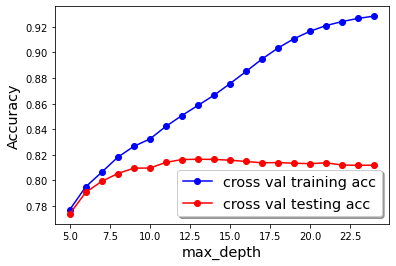

In [100]:
depth_range = range(5,25)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(max_depth=d, criterion='entropy', max_features=None, min_samples_leaf=1, 
                                    min_samples_split=15, n_estimators=900, random_state=2, n_jobs=-1)
    rf_reg.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(rf_reg.predict(X_train), y_train))
    test_acc.append(accuracy_score(rf_reg.predict(X_test), y_test))
    
    results  = cross_validate(rf_reg, X_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    
plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [124]:
rf_reg = RandomForestClassifier(n_estimators=891, min_samples_leaf=2, criterion='entropy', max_features=None, 
                                    min_samples_split=17, random_state=2, n_jobs=-1)

param_grid = { "max_depth" : [12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18]}


gs = GridSearchCV(estimator=rf_reg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8168391274577382
{'max_depth': 14}


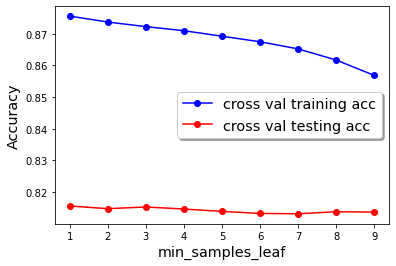

In [104]:
leaf_range = range(1,10)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in leaf_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(min_samples_leaf=d, max_depth=15, criterion='entropy', max_features=None, 
                                    min_samples_split=15, n_estimators=900, random_state=2, n_jobs=-1)
    rf_reg.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(rf_reg.predict(X_train), y_train))
    test_acc.append(accuracy_score(rf_reg.predict(X_test), y_test))
    
    results  = cross_validate(rf_reg, X_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))

plt.plot(leaf_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(leaf_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('min_samples_leaf', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [122]:
rf_reg = RandomForestClassifier(n_estimators=891, max_depth=15, criterion='entropy', max_features=None, 
                                    min_samples_split=17, random_state=2, n_jobs=-1)

param_grid = { "min_samples_leaf" : [1,2,3,4,5,6,7,8,9]}


gs = GridSearchCV(estimator=rf_reg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8160890319754005
{'min_samples_leaf': 2}


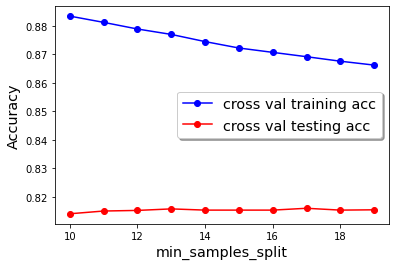

In [111]:
split_range = range(10,20)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in split_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(min_samples_split=d, max_depth=15, criterion='entropy', max_features=None, 
                                    min_samples_leaf=3, n_estimators=900, random_state=2, n_jobs=-1)
    rf_reg.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(rf_reg.predict(X_train), y_train))
    test_acc.append(accuracy_score(rf_reg.predict(X_test), y_test))
    
    results  = cross_validate(rf_reg, X_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))

plt.plot(split_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(split_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('min_samples_split', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [121]:
rf_reg = RandomForestClassifier(n_estimators=891, max_depth=15, criterion='entropy', max_features=None, 
                                    min_samples_leaf=3, random_state=2, n_jobs=-1)

param_grid = { "min_samples_split" : [14,15,16,17,18,19]}


gs = GridSearchCV(estimator=rf_reg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8159819082474948
{'min_samples_split': 17}


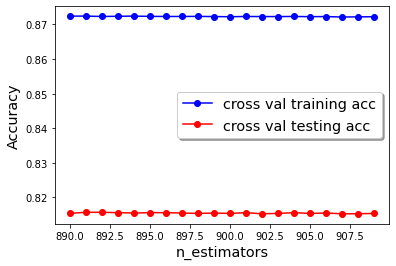

In [113]:
n_range = range(890,910)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in n_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(n_estimators=d, min_samples_split=15, max_depth=15, criterion='entropy', 
                                    max_features=None, min_samples_leaf=3, random_state=2, n_jobs=-1)
    rf_reg.fit(X_train, y_train.ravel()) 
    train_acc.append(accuracy_score(rf_reg.predict(X_train), y_train))
    test_acc.append(accuracy_score(rf_reg.predict(X_test), y_test))
    
    results  = cross_validate(rf_reg, X_data, y_data.ravel(), scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))

plt.plot(n_range, cross_val_train, 'bo-', label ='cross val training acc')
plt.plot(n_range, cross_val_test, 'ro-', label = 'cross val testing acc')

plt.xlabel('n_estimators', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [117]:
rf_reg = RandomForestClassifier(min_samples_split=15, max_depth=15, criterion='entropy', max_features=None, 
                                    min_samples_leaf=3, random_state=2, n_jobs=-1)

param_grid = { "n_estimators" : [890,890.5,891,891.5,892,892.5,893,893.5,894,894.5,895]}

gs = GridSearchCV(estimator=rf_reg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.81533934        nan 0.81566071        nan 0.81566071        nan
 0.81555359        nan 0.81544646        nan 0.81555353]
  warnings.warn(


0.8156607091040259
{'n_estimators': 891}


In [19]:
rf = RandomForestClassifier(n_estimators=891, min_samples_split=19, max_depth=11, criterion='entropy', max_features=None, 
                                    min_samples_leaf=3, random_state=2, n_jobs=-1)
rf.fit(X_train,y_train)
results  = cross_validate(rf, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.83864488 0.83692596 0.84134422 0.83290936 0.84214754]
test_score:  [0.8003212  0.8189609  0.81842528 0.81306909 0.82217461]
cross val training accuracy is: 0.8383943940255681
cross val testing accuracy is: 0.8145902173327109


In [20]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
11,avg_training_score,0.373702
0,department,0.229055
9,KPIs_met >80%,0.191823
7,previous_year_rating,0.085214
6,age,0.031487
1,region,0.025490
10,awards_won?,0.024312
8,length_of_service,0.022786
4,recruitment_channel,0.004166
5,no_of_trainings,0.004073


In [23]:
X_data4 = df_hr.drop(['is_promoted','gender','education','no_of_trainings','recruitment_channel'], axis = 1)

In [24]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_data4, y_data, test_size=0.3, random_state=2)

In [25]:
rf = RandomForestClassifier(n_estimators=891, min_samples_split=19, max_depth=11, criterion='entropy', max_features=None, 
                                    min_samples_leaf=3, random_state=2, n_jobs=-1)
rf.fit(X_train4,y_train4)
results  = cross_validate(rf, X_data4, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.83851098 0.83772928 0.84147811 0.834516   0.84187977]
test_score:  [0.7987152  0.81681843 0.81628281 0.81146224 0.82217461]
cross val training accuracy is: 0.8388228279817962
cross val testing accuracy is: 0.8130906571822788


In [27]:
rf = RandomForestClassifier(random_state=2, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"],
              "n_estimators": [700,800,900],
              "max_depth": [10,12,15], 
              "min_samples_leaf" : [1,3,5], 
              "min_samples_split": [10,15,20],
              "max_features": ["auto" "sqrt", "log2",None]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data4, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8154465763417132
{'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 800}


In [30]:
rf = RandomForestClassifier(random_state=2, n_jobs=-1, criterion='entropy', max_depth=12, max_features=None)

param_grid = { "n_estimators": [775,800,825],
              "min_samples_leaf" : [5,7,10], 
              "min_samples_split": [20,25,30]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data4, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8154465763417132
{'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 800}


In [31]:
rf = RandomForestClassifier(random_state=2, n_jobs=-1, criterion='entropy', max_depth=12, max_features=None)

param_grid = { "n_estimators": [795,800,805],
              "min_samples_leaf" : [4,5,6], 
              "min_samples_split": [18,20,22]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data4, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.8154465763417132
{'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 795}


In [32]:
rf = RandomForestClassifier(n_estimators=795, min_samples_split=20, max_depth=12, criterion='entropy', max_features=None, 
                                    min_samples_leaf=5, random_state=2, n_jobs=-1)
rf.fit(X_train4,y_train4)
results  = cross_validate(rf, X_data4, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.84547402 0.84268309 0.84321864 0.84147811 0.84469139]
test_score:  [0.80620985 0.82056776 0.81521157 0.81414033 0.82110337]
cross val training accuracy is: 0.8435090500474628
cross val testing accuracy is: 0.8154465763417132


#### Support Vector Classifier<a id="part1.3.4"></a>

In [126]:
results = cross_validate(svc, X_data, y_data, scoring='accuracy', cv=5, return_train_score=True)
print(results['train_score'])
print(results['test_score'])
print('cross val training accuracy is', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is', sum(results['test_score'])/len(results['test_score']))

[0.70862346 0.71067077 0.70745749 0.70893025 0.70558308]
[0.70503212 0.71505088 0.7070166  0.69683985 0.71237279]
cross val training accuracy is 0.7082530090630632
cross val testing accuracy is 0.7072624496925641


In [5]:
svc = SVC(random_state=2)

param_grid = { "C" : [1,10,100,1000],
              "kernel": ['rbf','poly','sigmoid'],
              "class_weight": ['balanced', None]}

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7839556984891425
{'C': 1000, 'class_weight': 'balanced', 'kernel': 'rbf'}


In [7]:
svclassifier = SVC(random_state=2, kernel='rbf', class_weight='balanced')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
param_grid = { "C" : [900,1000,1200,1300,1400,1500]}


gs = GridSearchCV(estimator=svclassifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7853483642986665
{'C': 1500}


In [10]:
svclassifier = SVC(random_state=2, kernel='rbf', class_weight='balanced')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
param_grid = { "C" : [1400,1425,1450,1475,1500,1525,1550,1575,1600]}


gs = GridSearchCV(estimator=svclassifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7855625544077285
{'C': 1425}


In [11]:
svclassifier = SVC(random_state=2, kernel='rbf', class_weight='balanced')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
param_grid = { "C" : [1421,1422,1423,1424,1425,1426,1427,1428,1429]}


gs = GridSearchCV(estimator=svclassifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7855625544077285
{'C': 1425}


In [13]:
svclassifier = SVC(random_state=2, kernel='rbf', class_weight='balanced', C=1425)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
param_grid = { 'gamma': [1,10,100,1000,'scale','auto']}


gs = GridSearchCV(estimator=svclassifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7855625544077285
{'gamma': 'scale'}


In [38]:
svc = SVC(C=1425, random_state=2, kernel='rbf', class_weight='balanced', gamma='scale')
svc.fit(X_train,y_train)
results  = cross_validate(svc, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.79941082 0.79542107 0.79689383 0.79394832 0.79207391]
test_score:  [0.7735546  0.79057311 0.78682378 0.79432244 0.78253883]
cross val training accuracy is: 0.7955495892574506
cross val testing accuracy is: 0.7855625544077285


Text(0.5, 0, 'Permutation Importance')

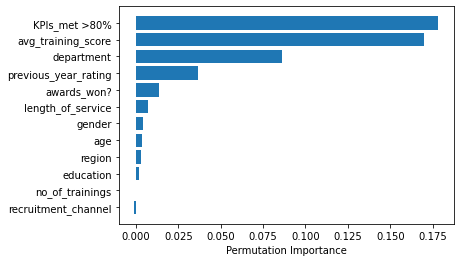

In [156]:
svc = SVC(C=1425, random_state=2, kernel='rbf', class_weight='balanced', gamma='scale')
svc.fit(X_train, y_train)

perm_importance = permutation_importance(svc, X_test, y_test)

features = df_hr.columns

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [157]:
X_data5 = df_hr.drop(['is_promoted','recruitment_channel','no_of_trainings','education'], axis = 1)

In [158]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_data5, y_data, test_size=0.3, random_state=2)

In [159]:
svc = SVC(C=1425, random_state=2, kernel='rbf', class_weight='balanced', gamma='scale')
svc.fit(X_train5,y_train5)
results  = cross_validate(svc, X_data5, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.79539368 0.79140447 0.79167225 0.79287723 0.79019949]
test_score:  [0.77569593 0.78789502 0.78789502 0.79003749 0.78093198]
cross val training accuracy is: 0.792309422778945
cross val testing accuracy is: 0.7844910877416735


In [160]:
svc = SVC(random_state=2)

param_grid = { "C" : [1,10,100,1000],
              "kernel": ['rbf','poly','sigmoid'],
              "class_weight": ['balanced', None]}

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data5, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7837412216463334
{'C': 1000, 'class_weight': None, 'kernel': 'rbf'}


In [163]:
svc = SVC(random_state=2, class_weight=None, kernel='rbf')

param_grid = { "C" : [900,1000,1100],
             'gamma': [1,10,100,1000,'scale','auto']}

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data5, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7842768402858621
{'C': 1100, 'gamma': 'scale'}


In [164]:
svc = SVC(random_state=2, class_weight=None, kernel='rbf', gamma='scale')

param_grid = { "C" : [1000,1500,2000]}

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data4, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7858837535511974
{'C': 2000}


In [165]:
svc = SVC(random_state=2, class_weight=None, kernel='rbf', gamma='scale')

param_grid = { "C" : [2000,5000,8000]}

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data5, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7912391370919923
{'C': 8000}


In [166]:
svc = SVC(random_state=2, class_weight=None, kernel='rbf', gamma='scale')

param_grid = { "C" : [8000,10000,12000]}

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data5, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7912391370919923
{'C': 8000}


In [167]:
svc = SVC(random_state=2, class_weight=None, kernel='rbf', gamma='scale')

param_grid = { "C" : [6000,7000,8000,9000]}

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data5, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7919890031873325
{'C': 7000}


In [168]:
svc = SVC(random_state=2, class_weight=None, kernel='rbf', gamma='scale')

param_grid = { "C" : [6500,6750,7000,7250,7500]}

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data5, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7922031359496449
{'C': 7500}


In [169]:
svc = SVC(random_state=2, class_weight=None, kernel='rbf', gamma='scale')

param_grid = { "C" : [7300,7400,7500,7600,7700,7800]}

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data5, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7922031359496449
{'C': 7500}


In [171]:
svc = SVC(random_state=2, class_weight=None, kernel='rbf', gamma='scale')

param_grid = { "C" : [7460,7470,7480,7490,7500,7510,7520,7530,7540]}

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data5, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7922031359496449
{'C': 7460}


In [172]:
svc = SVC(random_state=2, class_weight=None, kernel='rbf', gamma='scale')

param_grid = { "C" : [7410,7420,7430,7440,7450,7460,7470]}

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data5, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7922031359496449
{'C': 7460}


In [173]:
svc = SVC(random_state=2, class_weight=None, kernel='rbf', gamma='scale')

param_grid = { "C" : [7456,7457,7458,7459,7460,7461,7462,7463,7464]}

gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data5, y_data)
print(gs.best_score_)
print(gs.best_params_)

0.7922031359496449
{'C': 7460}


In [174]:
svc = SVC(random_state=2, class_weight=None, kernel='rbf', gamma='scale', C=7460)
svc.fit(X_train5,y_train5)
results  = cross_validate(svc, X_data5, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.80128548 0.800241   0.79890213 0.79930379 0.80211541]
test_score:  [0.78372591 0.7959293  0.79539368 0.79646492 0.78950187]
cross val training accuracy is: 0.8003695618017067
cross val testing accuracy is: 0.7922031359496449


#### Voting Classifier <a id="part1.3.5"></a>

In [175]:
lg = LogisticRegression(solver='lbfgs', C=0.007, random_state=2)
xgb = XGBClassifier(n_estimators=470, gamma=10, max_depth=15, colsample_bytree=0.6, subsample=0.8, min_child_weight=5, 
                    learning_rate=0.1, random_state=2, use_label_encoder=False, eval_metric='logloss')
rf = RandomForestClassifier(n_estimators=795, min_samples_split=20, max_depth=12, criterion='entropy', max_features=None, 
                                    min_samples_leaf=5, random_state=2, n_jobs=-1)
svc = SVC(random_state=2, class_weight=None, kernel='rbf', gamma='scale', C=7460)

In [187]:
vc = VotingClassifier(estimators = [('xgb', xgb), ('rf', rf), ('svc', svc)], voting = 'hard')
vc.fit(X_train,y_train)
results  = cross_validate(vc, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.83690412 0.83357879 0.83545321 0.83023162 0.83491766]
test_score:  [0.80406852 0.82056776 0.81574719 0.81735404 0.82056776]
cross val training accuracy is: 0.834217081379683
cross val testing accuracy is: 0.8156610531845223


In [190]:
vc = VotingClassifier(estimators = [('xgb', xgb), ('rf', rf), ('svc', svc), ('lg', lg)], voting = 'hard')
vc.fit(X_train,y_train)
results  = cross_validate(vc, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.81655062 0.81523631 0.81590574 0.81282635 0.81617352]
test_score:  [0.78586724 0.79807177 0.7959293  0.79646492 0.80074987]
cross val training accuracy is: 0.8153385071794339
cross val testing accuracy is: 0.7954166183998191


In [191]:
vc = VotingClassifier(estimators = [('xgb', xgb), ('rf', rf)], voting = 'hard')
vc.fit(X_train,y_train)
results  = cross_validate(vc, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.84212641 0.8405409  0.84013924 0.84201366 0.84308475]
test_score:  [0.80942184 0.82003214 0.81574719 0.81521157 0.81360471]
cross val training accuracy is: 0.841580991468898
cross val testing accuracy is: 0.8148034898937825


In [192]:
vc = VotingClassifier(estimators = [('xgb', xgb), ('svc', svc)], voting = 'hard')
vc.fit(X_train,y_train)
results  = cross_validate(vc, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.81253348 0.81550408 0.81496854 0.81403133 0.81644129]
test_score:  [0.78640257 0.79860739 0.79110873 0.80128548 0.79378682]
cross val training accuracy is: 0.8146957432983308
cross val testing accuracy is: 0.7942382000461068


In [193]:
vc = VotingClassifier(estimators = [('rf', rf), ('svc', svc)], voting = 'hard')
vc.fit(X_train,y_train)
results  = cross_validate(vc, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.82552223 0.82594725 0.82634891 0.82179676 0.82621502]
test_score:  [0.78211991 0.7959293  0.79646492 0.79807177 0.79432244]
cross val training accuracy is: 0.8251660335313474
cross val testing accuracy is: 0.7933816689968562


In [194]:
vc = VotingClassifier(estimators = [('xgb', xgb)], voting = 'hard')
vc.fit(X_train,y_train)
results  = cross_validate(vc, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.8303428  0.8284911  0.82889276 0.83023162 0.82889276]
test_score:  [0.81263383 0.82163899 0.81414033 0.81842528 0.82110337]
cross val training accuracy is: 0.8293702059926611
cross val testing accuracy is: 0.8175883627388348


## 2. Airbnb <a id="part2"></a>

### 2.1 Load and Sample the data <a id="part2.1"></a>

In [6]:
# Load dataset into a DataFrame
df_list = pd.read_csv('listings_new.csv')

# Create a copy of the DataFrame
df2 = df_list.copy()

# Show overview of the dataset
df2.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3,1.33235,103.78521,2,81,3.0,18,1705,0.28,1,365
1,2,1.28875,103.80814,2,44,15.0,18,128,0.23,32,331
2,2,1.28837,103.81099,2,40,3.0,10,348,0.11,32,276
3,9,1.31125,103.83816,2,65,2.0,125,5,1.35,6,336
4,2,1.28976,103.80896,2,44,3.0,13,206,0.15,32,340


In [7]:
# Set "price" as the target/model output and the other features as model inputs
ydata = df2['price']
Xdata = df2.drop(['price'], axis=1)

In [8]:
# Split the data into training and testing data
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.3, random_state=2)

### 2.2 Build the Model(s) <a id="part2.2"></a>

#### Linear Regression <a id="part2.2.1"></a>

In [204]:
# Create the model "lg"
lg = LinearRegression()
# Fit the model to the training set
lg.fit(Xtrain,ytrain.ravel())

LinearRegression()

#### MLP Regressor <a id="part2.2.2"></a>

In [61]:
# Create the model "mlp"
mlp = MLPRegressor(random_state=2)
# Fit the model to the training set
mlp.fit(Xtrain,ytrain.ravel())

MLPRegressor(random_state=2)

#### XGBoost Regressor<a id="part2.2.3"></a>

In [20]:
# Create the model "xgbr"
xgbr = XGBRegressor(random_state=2)
# Fit the model to the training set
xgbr.fit(Xtrain,ytrain.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Random Forest Regressor<a id="part2.2.4"></a>

In [42]:
# Create the model "rf_reg"
rf_reg = RandomForestRegressor(random_state = 2)
# Fit the model to the training set
rf_reg.fit(Xtrain, ytrain.ravel()) 

RandomForestRegressor(random_state=2)

### 2.3 Evaluate and Improve the Model(s) <a id="part2.3"></a>

#### Linear Regression<a id="part2.3.1"></a>

In [27]:
# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(lg, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-67.14587614 -66.34269939 -65.71667402 -64.70612736 -65.24915   ]
test_score:  [-61.32441819 -64.37694102 -66.89142828 -70.84263958 -68.71774192]
cross val training root mean squared error (RMSE) is: 65.83210538310384
cross val testing root mean squared error (RMSE) is: 66.43063379637219


In [209]:
# Create the model "lm2" using statsmodel.api
lm2 = sm.OLS(ytrain, Xtrain).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                              2253.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):                        0.00
Time:                        23:04:15   Log-Likelihood:                         -23532.
No. Observations:                4195   AIC:                                  4.708e+04
Df Residuals:                    4185   BIC:                                  4.715e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood                      1.1134      0.218      5.109      0.000       0.686       1.541
latitude                         -83.9340     63.250     -1.327      0.185    -207.937      40.069
longitude                          0.0603      0.794      0.076      0.939      -1.497       1.617
room_type                         88.5484      1.825     48.529      0.000      84.971      92.126
minimum_nights                    -2.1083      0.256     -8.233      0.000      -2.610      -1.606
number_of_reviews                 -0.2185      0.048     -4.590      0.000      -0.312      -0.125
last_review                        0.0042      0.001      3.349      0.001       0.002       0.007
reviews_per_month                  5.3826      1.349      3.991      0.000       2.739       8.026
calculated_host_listings_count    -0.0176      0.017     -1.053      0.292      -0.050       0.015
availability_365                   0.0850      0.007     11.342      0.000       0.070       0.100
==============================================================================
Omnibus:                      614.303   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              943.165
Skew:                           1.037   Prob(JB):                    1.56e-205
Kurtosis:                       4.047   Cond. No.                     8.00e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Set "price" as the target/model output and the other features as model inputs
Xdata2 = df2.drop(['price','latitude','longitude','calculated_host_listings_count'], axis=1)

In [45]:
# Task 2: Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(Xdata2, ydata, test_size=0.3, random_state=2)

In [219]:
lg = LinearRegression()
lg.fit(Xtrain2,ytrain2.ravel())

# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(lg, Xdata2, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-67.18682384 -66.36443373 -65.83347615 -64.84383551 -65.36590547]
test_score:  [-61.44244562 -64.46723955 -66.65685816 -70.48160988 -68.52009885]
cross val training root mean squared error (RMSE) is: 65.91889494162135
cross val testing root mean squared error (RMSE) is: 66.3136504133597


#### MLP Regressor<a id="part2.3.2"></a>

In [15]:
# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(mlp, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-65.93336536 -64.53388289 -63.20253977 -63.11258765 -63.29603071]
test_score:  [-62.61258911 -64.55485491 -68.70425706 -69.8365648  -70.12405379]
cross val training root mean squared error (RMSE) is: 64.01568127604749
cross val testing root mean squared error (RMSE) is: 67.16646393264753


In [13]:
mlp = MLPRegressor(random_state=2)

param_grid = { "activation" : ["identity", "logistic", "tanh", "relu"],
 "hidden_layer_sizes" : [(5,), (10,), (20,)],
 "max_iter" : [200, 2000, 4000],
 "solver" : ["lbfgs", "sgd", "adam"]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain, ytrain)

print(gs.best_score_)
print(gs.best_params_)

-65.32071881953736
{'activation': 'relu', 'hidden_layer_sizes': (20,), 'max_iter': 4000, 'solver': 'lbfgs'}


In [18]:
mlp = MLPRegressor(activation='relu', solver='lbfgs', random_state=2)

param_grid = { "hidden_layer_sizes" : [(30,), (40,), (50,)],
              "max_iter" : [5000,6000,7000]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain, ytrain)

print(gs.best_score_)
print(gs.best_params_)

-64.52778941244631
{'hidden_layer_sizes': (30,), 'max_iter': 5000}


In [19]:
mlp = MLPRegressor(activation='relu', solver='lbfgs', random_state=2)

param_grid = { "hidden_layer_sizes" : [(20,), (25,), (30,)],
              "max_iter" : [4000,4500,5000]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain, ytrain)

print(gs.best_score_)
print(gs.best_params_)

-64.4805201575498
{'hidden_layer_sizes': (30,), 'max_iter': 4000}


In [20]:
mlp = MLPRegressor(activation='relu', solver='lbfgs', random_state=2)

param_grid = { "hidden_layer_sizes" : [(29,), (30,), (31,), (32,), (33,), (34,), (35,)],
              "max_iter" : [3000,3250,3500,3750]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain, ytrain)

print(gs.best_score_)
print(gs.best_params_)

-64.51601070176363
{'hidden_layer_sizes': (30,), 'max_iter': 3500}


In [22]:
mlp = MLPRegressor(hidden_layer_sizes=(30,), activation='relu', solver='lbfgs', random_state=2)

param_grid = { "max_iter" : [3300,3400,3500,3600,3700]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain, ytrain)

print(gs.best_score_)
print(gs.best_params_)

-64.48410174791749
{'max_iter': 3400}


In [23]:
mlp = MLPRegressor(hidden_layer_sizes=(30,), activation='relu', solver='lbfgs', random_state=2)

param_grid = { "max_iter" : [3350,3360,3370,3380,3390,3400,3410,3420,3430,3440,3450]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain, ytrain)

print(gs.best_score_)
print(gs.best_params_)

-64.47898862346862
{'max_iter': 3350}


In [24]:
mlp = MLPRegressor(hidden_layer_sizes=(30,), activation='relu', solver='lbfgs', random_state=2)

param_grid = { "max_iter" : [3300,3310,3320,3330,3340,3350]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain, ytrain)

print(gs.best_score_)
print(gs.best_params_)

-64.47898862346862
{'max_iter': 3350}


In [154]:
mlp = MLPRegressor(activation='relu', hidden_layer_sizes=(30,), max_iter=3350, solver='lbfgs', random_state=2)
mlp.fit(Xtrain,ytrain)

# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(mlp, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-62.99717041 -63.51339568 -63.35255618 -61.92080936 -62.09105005]
test_score:  [-62.83285443 -64.47893354 -67.19075994 -69.97166547 -67.83853424]
cross val training root mean squared error (RMSE) is: 62.774996335435596
cross val testing root mean squared error (RMSE) is: 66.46254952548814


Text(0.5, 0, 'Permutation Importance')

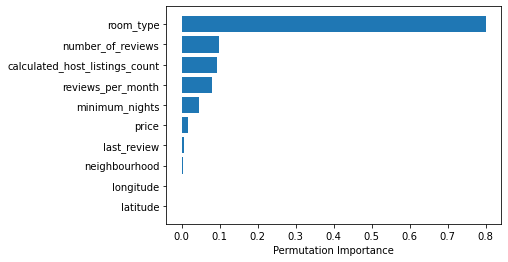

In [207]:
mlp = MLPRegressor(activation='relu', hidden_layer_sizes=(30,), max_iter=3350, solver='lbfgs', random_state=2)
mlp.fit(Xtrain,ytrain)

perm_importance = permutation_importance(mlp, Xtest, ytest)

features = df_list.columns

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [208]:
Xdata3 = df_list.drop(['price', 'latitude', 'longitude', 'neighbourhood', 'last_review'], axis = 1)

In [209]:
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(Xdata3, ydata, test_size=0.3, random_state=2)

In [210]:
mlp = MLPRegressor(activation='relu', hidden_layer_sizes=(30,), max_iter=3350, solver='lbfgs', random_state=2)
mlp.fit(Xtrain3,ytrain3)

# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(mlp, Xdata3, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-65.87323365 -64.74980656 -62.8480103  -63.18499687 -63.87714791]
test_score:  [-63.47662761 -64.80775415 -64.95576459 -69.04806953 -67.38251155]
cross val training root mean squared error (RMSE) is: 64.10663905883453
cross val testing root mean squared error (RMSE) is: 65.93414548590272


In [211]:
mlp = MLPRegressor(random_state=2)

param_grid = { "activation" : ["identity", "logistic", "tanh", "relu"],
 "hidden_layer_sizes" : [(20, ), (25, ), (30, ), (35, ), (40, )],
 "max_iter" : [2000, 3000, 4000],
 "solver" : ["lbfgs", "sgd", "adam"]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain3, ytrain3)

print(gs.best_score_)
print(gs.best_params_)

-64.25103947067866
{'activation': 'logistic', 'hidden_layer_sizes': (35,), 'max_iter': 4000, 'solver': 'lbfgs'}


In [213]:
mlp = MLPRegressor(random_state=2, activation='logistic', solver='lbfgs')

param_grid = { "hidden_layer_sizes" : [(32,), (35,), (37,)],
 "max_iter" : [3900, 4000, 5000, 6000]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain3, ytrain3)

print(gs.best_score_)
print(gs.best_params_)

-63.776404565757026
{'hidden_layer_sizes': (35,), 'max_iter': 6000}


In [214]:
mlp = MLPRegressor(random_state=2, activation='logistic', solver='lbfgs')

param_grid = { "hidden_layer_sizes" : [(33,), (34,), (35,), (36,)],
 "max_iter" : [5900,6000,7000,8000]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain3, ytrain3)

print(gs.best_score_)
print(gs.best_params_)

-63.506360254835634
{'hidden_layer_sizes': (35,), 'max_iter': 8000}


In [215]:
mlp = MLPRegressor(random_state=2, activation='logistic', solver='lbfgs', hidden_layer_sizes=(35,))

param_grid = { "max_iter" : [8000,9000,10000]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain3, ytrain3)

print(gs.best_score_)
print(gs.best_params_)

-63.45756685512163
{'max_iter': 9000}


In [216]:
mlp = MLPRegressor(random_state=2, activation='logistic', solver='lbfgs', hidden_layer_sizes=(35,))

param_grid = { "max_iter" : [8500,8750,9000,9250,9500]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain3, ytrain3)

print(gs.best_score_)
print(gs.best_params_)

-63.457240795407756
{'max_iter': 9500}


In [217]:
mlp = MLPRegressor(random_state=2, activation='logistic', solver='lbfgs', hidden_layer_sizes=(35,))

param_grid = { "max_iter" : [9400,9500,9600,9700,9800]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain3, ytrain3)

print(gs.best_score_)
print(gs.best_params_)

-63.455123669553075
{'max_iter': 9800}


In [218]:
mlp = MLPRegressor(random_state=2, activation='logistic', solver='lbfgs', hidden_layer_sizes=(35,))

param_grid = { "max_iter" : [9750,9800,9850,9900,9950]}

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(Xtrain3, ytrain3)

print(gs.best_score_)
print(gs.best_params_)

-63.455123669553075
{'max_iter': 9800}


In [219]:
mlp = MLPRegressor(random_state=2, activation='logistic', solver='lbfgs', hidden_layer_sizes=(35,), max_iter=9800)
mlp.fit(Xtrain3,ytrain3)

# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(mlp, Xdata3, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-62.76873454 -60.83159434 -62.43971673 -60.13820316 -60.53063594]
test_score:  [-60.02755518 -62.5381013  -64.85925684 -70.43083618 -66.72529262]
cross val training root mean squared error (RMSE) is: 61.34177694239602
cross val testing root mean squared error (RMSE) is: 64.91620842274492


#### XGBoost Regressor<a id="part2.3.3"></a>

In [21]:
results  = (cross_validate(xgbr, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-22.17208454 -22.36154564 -21.68152775 -22.28684273 -21.68458936]
test_score:  [-56.54598743 -58.84744821 -57.19074279 -59.90249935 -59.39246425]
cross val training root mean squared error (RMSE) is: 22.03731800508005
cross val testing root mean squared error (RMSE) is: 58.37582840807322


In [36]:
xgbr = XGBRegressor(random_state=2)

param_grid = { "n_estimators" : [200,400,600,800,1000],
            "max_depth": [1,5,10,15],
            "min_child_weight": [1,5,10],
            "gamma": [0.01,0.1,1,10],
            "subsample": [0.4,0.6,0.8],
            "colsample_bytree": [0.4,0.6,0.8,1],
            "learning_rate": [0.01,0.1]}

gs = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs.fit(Xtrain,ytrain)

print(gs.best_score_)
print(gs.best_params_)

-49.75433727700533
{'subsample': 0.6, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 10, 'colsample_bytree': 0.6}


In [130]:
xgbr = XGBRegressor(max_depth=10, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, n_estimators=800, random_state=2)

param_grid = { "gamma": [10,50,100],
            "learning_rate": [0.001,0.01]}

gs = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs.fit(Xtrain,ytrain)

print(gs.best_score_)
print(gs.best_params_)

-49.70853038267627
{'gamma': 100, 'learning_rate': 0.01}


In [131]:
xgbr = XGBRegressor(learning_rate=0.01, max_depth=10, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, 
                    n_estimators=800, random_state=2)

param_grid = { "gamma": [90,100,200]}

gs = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs.fit(Xtrain,ytrain)

print(gs.best_score_)
print(gs.best_params_)

-49.6673485878615
{'gamma': 90}


In [132]:
xgbr = XGBRegressor(learning_rate=0.01, max_depth=10, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, 
                    n_estimators=800, random_state=2)

param_grid = { "gamma": [60,70,80,90,100]}

gs = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs.fit(Xtrain,ytrain)

print(gs.best_score_)
print(gs.best_params_)

-49.6673485878615
{'gamma': 90}


In [134]:
xgbr = XGBRegressor(gamma=90, learning_rate=0.01, max_depth=10, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, 
                    random_state=2)

param_grid = { "n_estimators" : [700,750,800,850,900]}

gs = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs.fit(Xtrain,ytrain)

print(gs.best_score_)
print(gs.best_params_)

-49.627077040534196
{'n_estimators': 900}


In [136]:
xgbr = XGBRegressor(gamma=90, learning_rate=0.01, max_depth=10, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, random_state=2)

param_grid = { "n_estimators" : [900,950,1000]}

gs = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs.fit(Xtrain,ytrain)

print(gs.best_score_)
print(gs.best_params_)

-49.60963126254045
{'n_estimators': 1000}


In [137]:
xgbr = XGBRegressor(gamma=90, learning_rate=0.01, max_depth=10, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, random_state=2)

param_grid = { "n_estimators" : [1000,1100,1200,1300,1400,1500]}

gs = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs.fit(Xtrain,ytrain)

print(gs.best_score_)
print(gs.best_params_)

-49.5896268666239
{'n_estimators': 1200}


In [138]:
xgbr = XGBRegressor(gamma=90, learning_rate=0.01, max_depth=10, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, random_state=2)

param_grid = { "n_estimators" : [1150,1175,1200,1225,1250]}

gs = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs.fit(Xtrain,ytrain)

print(gs.best_score_)
print(gs.best_params_)

-49.58897883347875
{'n_estimators': 1250}


In [140]:
xgbr = XGBRegressor(gamma=90, learning_rate=0.01, max_depth=10, min_child_weight=5, subsample=0.6, colsample_bytree=0.6, 
                    random_state=2)

param_grid = { "n_estimators" : [1230,1240,1250,1260,1270,1280,1290]}

gs = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gs.fit(Xtrain,ytrain)

print(gs.best_score_)
print(gs.best_params_)

-49.588664244888285
{'n_estimators': 1240}


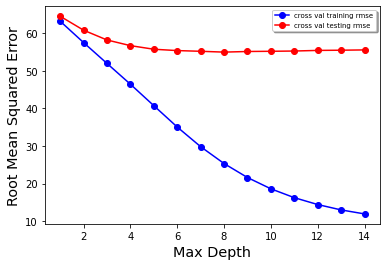

In [141]:
depth_range = range(1,15)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    xgb = XGBRegressor(max_depth=d, gamma=90, learning_rate=0.01, n_estimators=1240, min_child_weight=5, subsample=0.6, 
                       colsample_bytree=0.6, random_state=2)
    xgb.fit(Xtrain, ytrain.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain), ytrain.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest), ytest.ravel())))
    
    results  = cross_validate(xgb, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-small')
plt.show()

In [99]:
xgb = XGBRegressor(max_depth=2, n_estimators=1240, min_child_weight=5, gamma=90, subsample=0.6, colsample_bytree=0.6, 
                   learning_rate=0.01, random_state=2)

xgb.fit(Xtrain, ytrain.ravel()) 
results  = cross_validate(xgb, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

cross val training root mean squared error (RMSE) is: 57.65572354850358
cross val testing root mean squared error (RMSE) is: 60.897057589809776


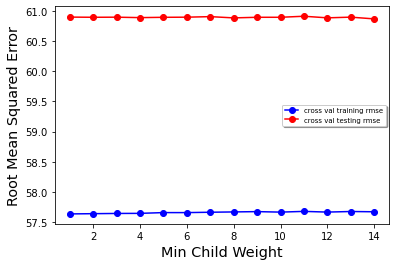

In [105]:
weight_range = range(1,15)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in weight_range:
    xgb = XGBRegressor(min_child_weight=d, n_estimators=1240, max_depth=2, gamma=90, subsample=0.6, colsample_bytree=0.6, 
                       learning_rate=0.01, random_state=2)
    xgb.fit(Xtrain, ytrain.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain), ytrain.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest), ytest.ravel())))
    
    results  = cross_validate(xgb, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(weight_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(weight_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('min_child_weight', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-small')
plt.show()

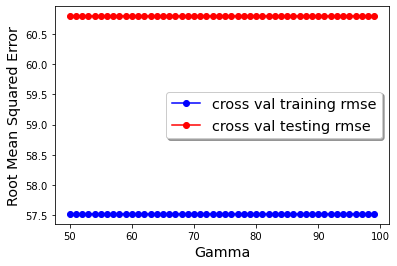

In [143]:
gamma_range = range(50,100)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in gamma_range:
    xgb = XGBRegressor(gamma=d, min_child_weight=8, n_estimators=1240, max_depth=2, subsample=0.6, colsample_bytree=0.6, 
                       learning_rate=0.01, random_state=2)
    xgb.fit(Xtrain, ytrain.ravel())  
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain), ytrain.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest), ytest.ravel())))
    
    results  = cross_validate(xgb, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(gamma_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(gamma_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('gamma', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

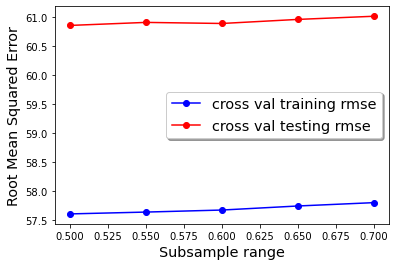

In [112]:
subsample_range = np.arange(0.5,0.71,0.05)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in subsample_range:
    xgb = XGBRegressor(subsample=d, gamma=90, min_child_weight=8, n_estimators=1240, max_depth=2, colsample_bytree=0.6, 
                       learning_rate=0.01, random_state=2)
    xgb.fit(Xtrain, ytrain.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain), ytrain.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest), ytest.ravel())))
    
    results  = cross_validate(xgb, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(subsample_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(subsample_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('subsample', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

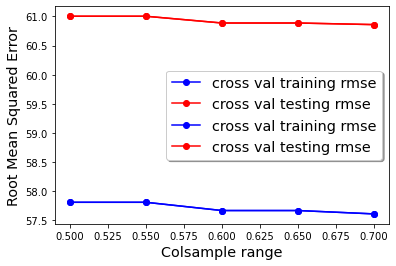

In [113]:
colsample_range = np.arange(0.5,0.71,0.05)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in colsample_range:
    xgb = XGBRegressor(colsample_bytree=d, subsample=0.6, gamma=90, min_child_weight=8, n_estimators=1240, max_depth=2, 
                       learning_rate=0.01, random_state=2)
    xgb.fit(Xtrain, ytrain.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain), ytrain.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest), ytest.ravel())))
    
    results  = cross_validate(xgb, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(colsample_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(colsample_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('colsample_bytree', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

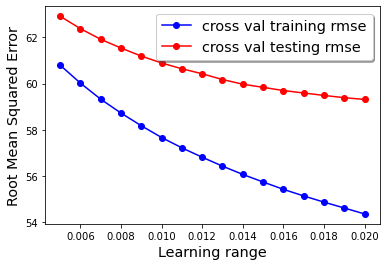

In [114]:
learning_range = np.arange(0.005,0.021,0.001)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in learning_range:
    xgb = XGBRegressor(learning_rate=d, colsample_bytree=0.6, subsample=0.6, gamma=90, min_child_weight=8, 
                       n_estimators=1240, max_depth=2, random_state=2)
    xgb.fit(Xtrain, ytrain.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain), ytrain.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest), ytest.ravel())))
    
    results  = cross_validate(xgb, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(learning_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(learning_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('learning_rate', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [71]:
xgb = XGBRegressor(learning_rate=0.01, colsample_bytree=0.6, subsample=0.5, gamma=90, min_child_weight=8, n_estimators=1240,
                   max_depth=2, random_state=2)

xgb.fit(Xtrain, ytrain.ravel()) 
results  = cross_validate(xgb, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

cross val training root mean squared error (RMSE) is: 57.44299773881694
cross val testing root mean squared error (RMSE) is: 60.76528580425522


In [72]:
pd.concat((pd.DataFrame(Xtrain.columns, columns = ['feature']), 
           pd.DataFrame(xgb.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
3,room_type,0.547774
8,calculated_host_listings_count,0.077164
9,availability_365,0.062371
4,minimum_nights,0.055172
2,longitude,0.054815
1,latitude,0.049463
0,neighbourhood,0.044803
7,reviews_per_month,0.039982
5,number_of_reviews,0.035279
6,last_review,0.033176


In [74]:
Xdata4 = df_list.drop(['price','last_review','number_of_reviews','reviews_per_month'], axis = 1)

In [75]:
Xtrain4, Xtest4, ytrain4, ytest4 = train_test_split(Xdata4, ydata, test_size=0.3, random_state=2)

In [78]:
xgb = XGBRegressor(learning_rate=0.01, colsample_bytree=0.6, subsample=0.5, gamma=90, min_child_weight=8, 
                   n_estimators=1240, max_depth=2, random_state=2)

xgb.fit(Xtrain4, ytrain4.ravel()) 
results  = cross_validate(xgb, Xdata4, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

cross val training root mean squared error (RMSE) is: 57.73669532798954
cross val testing root mean squared error (RMSE) is: 61.199294368255984


In [123]:
xgbr = XGBRegressor(random_state=2)

param_grid = { "n_estimators" : [200,600,1000],
            "max_depth": [1,5,10,15],
            "min_child_weight": [1,5,10],
            "gamma": [0.01,0.1,1,10],
            "subsample": [0.4,0.6,0.8],
            "colsample_bytree": [0.4,0.6,0.8,1],
            "learning_rate": [0.01,0.1]}

gs = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, scoring='neg_root_mean_squared_error', cv=5, 
                        n_jobs=-1)
gs.fit(Xtrain4,ytrain4)

print(gs.best_score_)
print(gs.best_params_)

-50.16779806063056
{'subsample': 0.8, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6}


In [124]:
xgbr = XGBRegressor(random_state=2)

param_grid = { "n_estimators" : [400,500,600,700,800],
            "max_depth": [7,10,13],
            "min_child_weight": [1,2,3,4],
            "gamma": [0.05,0.1,0.15],
            "subsample": [0.8,0.9,1],
            "colsample_bytree": [0.5,0.6,0.7],
            "learning_rate": [0.01,0.05]}

gs = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, scoring='neg_root_mean_squared_error', cv=5, 
                        n_jobs=-1)
gs.fit(Xtrain4,ytrain4)

print(gs.best_score_)
print(gs.best_params_)

-49.97391789706977
{'subsample': 0.9, 'n_estimators': 800, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.05, 'colsample_bytree': 0.6}


In [125]:
xgbr = XGBRegressor(random_state=2, subsample=0.9, min_child_weight=2, colsample_bytree=0.6)

param_grid = { "n_estimators" : [800,900,1000],
            "max_depth": [8,9,10,11,12],
            "gamma": [0.03,0.05,0.07],
            "learning_rate": [0.01,0.02,0.03]}

gs = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, scoring='neg_root_mean_squared_error', cv=5, 
                        n_jobs=-1)
gs.fit(Xtrain4,ytrain4)

print(gs.best_score_)
print(gs.best_params_)

-50.01677615150002
{'n_estimators': 1000, 'max_depth': 12, 'learning_rate': 0.01, 'gamma': 0.07}


In [126]:
xgbr = XGBRegressor(random_state=2, subsample=0.9, min_child_weight=2, colsample_bytree=0.6, max_depth=12,
                   learning_rate=0.01)

param_grid = { "n_estimators" : [1000,1250,1500],
            "gamma": [0.06,0.07,0.08,0.09]}

gs = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, scoring='neg_root_mean_squared_error', cv=5, 
                        n_jobs=-1)
gs.fit(Xtrain4,ytrain4)

print(gs.best_score_)
print(gs.best_params_)

-50.01677615150002
{'n_estimators': 1000, 'gamma': 0.07}


In [127]:
xgbr = XGBRegressor(random_state=2, subsample=0.9, min_child_weight=2, colsample_bytree=0.6, max_depth=12,
                   learning_rate=0.01, gamma=0.07)

param_grid = { "n_estimators" : [950,1000,1050,1100,1150,1200]}

gs = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, scoring='neg_root_mean_squared_error', cv=5, 
                        n_jobs=-1)
gs.fit(Xtrain4,ytrain4)

print(gs.best_score_)
print(gs.best_params_)

-50.01677615150002
{'n_estimators': 1000}


In [128]:
xgbr = XGBRegressor(random_state=2, subsample=0.9, min_child_weight=2, colsample_bytree=0.6, max_depth=12,
                   learning_rate=0.01, gamma=0.07)

param_grid = { "n_estimators" : [970,980,990,1000,1010,1020,1030,1040]}

gs = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, scoring='neg_root_mean_squared_error', cv=5,
                        n_jobs=-1)
gs.fit(Xtrain4,ytrain4)

print(gs.best_score_)
print(gs.best_params_)

-50.01593003296209
{'n_estimators': 990}


In [129]:
xgbr = XGBRegressor(random_state=2, subsample=0.9, min_child_weight=2, colsample_bytree=0.6, max_depth=12,
                   learning_rate=0.01, gamma=0.07)

param_grid = { "n_estimators" : [985,986,987,988,989,990,991,992,993,994,995]}

gs = RandomizedSearchCV(estimator=xgbr, param_distributions=param_grid, scoring='neg_root_mean_squared_error', cv=5, 
                        n_jobs=-1)
gs.fit(Xtrain4,ytrain4)

print(gs.best_score_)
print(gs.best_params_)

-50.01533616646075
{'n_estimators': 993}


In [130]:
xgb = XGBRegressor(random_state=2, subsample=0.9, min_child_weight=2, colsample_bytree=0.6, max_depth=12,
                   learning_rate=0.01, gamma=0.07, n_estimators=993)

xgb.fit(Xtrain4, ytrain4.ravel()) 
results  = cross_validate(xgb, Xdata2, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

cross val training root mean squared error (RMSE) is: 11.727287331275448
cross val testing root mean squared error (RMSE) is: 55.69479681457451


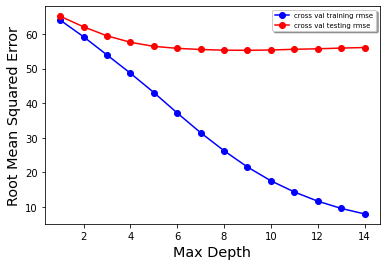

In [132]:
depth_range = range(1,15)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    xgb = XGBRegressor(random_state=2, subsample=0.9, min_child_weight=2, colsample_bytree=0.6, max_depth=d,
                   learning_rate=0.01, gamma=0.07, n_estimators=993)
    xgb.fit(Xtrain4, ytrain4.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain4), ytrain4.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest4), ytest4.ravel())))
    
    results  = cross_validate(xgb, Xdata4, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-small')
plt.show()

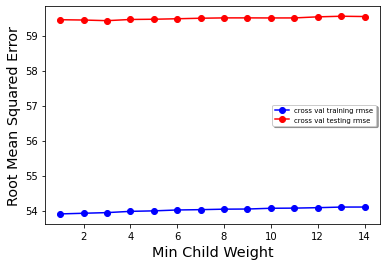

In [142]:
weight_range = range(1,15)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in weight_range:
    xgb = XGBRegressor(random_state=2, subsample=0.9, min_child_weight=d, colsample_bytree=0.6, max_depth=3,
                   learning_rate=0.01, gamma=0.07, n_estimators=993)
    xgb.fit(Xtrain4, ytrain4.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain4), ytrain4.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest4), ytest4.ravel())))
    
    results  = cross_validate(xgb, Xdata4, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('min_child_weight', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-small')
plt.show()

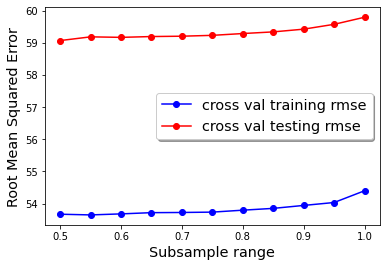

In [145]:
subsample_range = np.arange(0.5,1.01,0.05)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in subsample_range:
    xgb = XGBRegressor(random_state=2, subsample=d, min_child_weight=3, colsample_bytree=0.6, max_depth=3,
                   learning_rate=0.01, gamma=0.07, n_estimators=993)
    xgb.fit(Xtrain4, ytrain4.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain4), ytrain4.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest4), ytest4.ravel())))
    
    results  = cross_validate(xgb, Xdata4, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(subsample_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(subsample_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('subsample', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

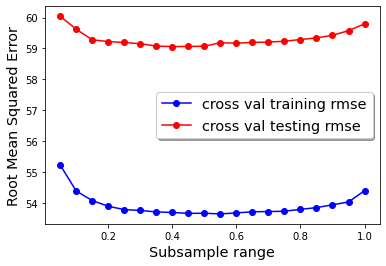

In [147]:
subsample_range = np.arange(0.05,1.01,0.05)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in subsample_range:
    xgb = XGBRegressor(random_state=2, subsample=d, min_child_weight=3, colsample_bytree=0.6, max_depth=3,
                   learning_rate=0.01, gamma=0.07, n_estimators=993)
    xgb.fit(Xtrain4, ytrain4.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain4), ytrain4.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest4), ytest4.ravel())))
    
    results  = cross_validate(xgb, Xdata4, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(subsample_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(subsample_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('subsample', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

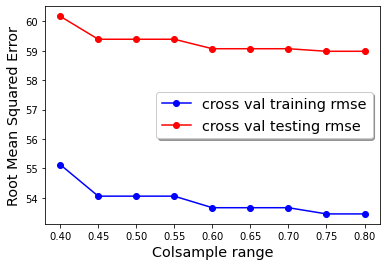

In [148]:
colsample_range = np.arange(0.4,0.81,0.05)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in colsample_range:
    xgb = XGBRegressor(random_state=2, subsample=0.5, min_child_weight=3, colsample_bytree=d, max_depth=3,
                   learning_rate=0.01, gamma=0.07, n_estimators=993)
    xgb.fit(Xtrain4, ytrain4.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain4), ytrain4.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest4), ytest4.ravel())))
    
    results  = cross_validate(xgb, Xdata4, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(colsample_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(colsample_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('colsample_bytree', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

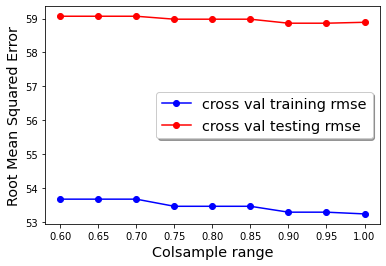

In [150]:
colsample_range = np.arange(0.6,1.01,0.05)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in colsample_range:
    xgb = XGBRegressor(random_state=2, subsample=0.5, min_child_weight=3, colsample_bytree=d, max_depth=3,
                   learning_rate=0.01, gamma=0.07, n_estimators=993)
    xgb.fit(Xtrain4, ytrain4.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain4), ytrain4.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest4), ytest4.ravel())))
    
    results  = cross_validate(xgb, Xdata4, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(colsample_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(colsample_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('colsample_bytree', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

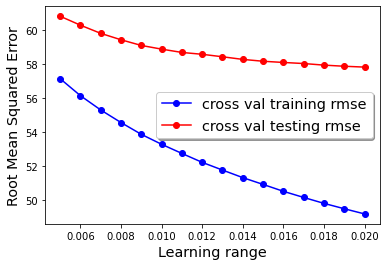

In [153]:
learning_range = np.arange(0.005,0.021,0.001)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in learning_range:
    xgb = XGBRegressor(random_state=2, subsample=0.5, min_child_weight=3, colsample_bytree=0.9, max_depth=3,
                   learning_rate=d, gamma=0.07, n_estimators=993)
    xgb.fit(Xtrain4, ytrain4.ravel()) 
    train_acc.append(sqrt(mean_squared_error(xgb.predict(Xtrain4), ytrain4.ravel())))
    test_acc.append(sqrt(mean_squared_error(xgb.predict(Xtest4), ytest4.ravel())))
    
    results  = cross_validate(xgb, Xdata4, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))
plt.plot(learning_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(learning_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('learning_rate', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [151]:
xgb = XGBRegressor(random_state=2, subsample=0.5, min_child_weight=3, colsample_bytree=0.9, max_depth=3,
                   learning_rate=0.01, gamma=0.07, n_estimators=993)

xgb.fit(Xtrain4, ytrain4.ravel()) 
results  = cross_validate(xgb, Xdata2, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

cross val training root mean squared error (RMSE) is: 53.28235181081216
cross val testing root mean squared error (RMSE) is: 58.86466450299497


#### Random Forest Regressor<a id="part2.3.4"></a>

In [43]:
# Evaluate the Model using K-folds Cross validation
results  = (cross_validate(rf_reg, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-18.38933524 -18.16629421 -18.38919317 -18.21508165 -18.29708701]
test_score:  [-53.36938186 -53.48732854 -54.8758734  -60.03262064 -58.56283057]
cross val training root mean squared error (RMSE) is: 18.291398255822244
cross val testing root mean squared error (RMSE) is: 56.06560700208015


In [80]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1)

param_grid = {"n_estimators": [500, 750, 1000],
              "max_depth": [15, 20, 25], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split": [1, 5 ,10],
              "max_features": ["auto" "sqrt", "log2",None]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain, ytrain)
print(gs.best_score_)
print(gs.best_params_)

-50.34831157519274
{'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [82]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2')

param_grid = {"n_estimators": [300,400,500],
              "max_depth": [25,30,35], 
              "min_samples_leaf" : [1,2,3], 
              "min_samples_split": [3,5,7]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain, ytrain)
print(gs.best_score_)
print(gs.best_params_)

-50.04838228657328
{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}


In [83]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=1)

param_grid = {"n_estimators": [100,200,300],
              "max_depth": [23,25,27], 
              "min_samples_split": [2,3,4]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain, ytrain)
print(gs.best_score_)
print(gs.best_params_)

-50.04207384610864
{'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 300}


In [84]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=1, min_samples_split=2)

param_grid = {"n_estimators": [275,300,325],
              "max_depth": [24,25,26]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain, ytrain)
print(gs.best_score_)
print(gs.best_params_)

-50.022228200149414
{'max_depth': 25, 'n_estimators': 325}


In [85]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=1, min_samples_split=2,
                          max_depth=25)

param_grid = {"n_estimators": [325,350,375]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain, ytrain)
print(gs.best_score_)
print(gs.best_params_)

-49.980749577901996
{'n_estimators': 350}


In [86]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=1, min_samples_split=2,
                          max_depth=25)

param_grid = {"n_estimators": [340,350,360]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain, ytrain)
print(gs.best_score_)
print(gs.best_params_)

-49.980749577901996
{'n_estimators': 350}


In [87]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=1, min_samples_split=2,
                          max_depth=25)

param_grid = {"n_estimators": [345,350,355]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain, ytrain)
print(gs.best_score_)
print(gs.best_params_)

-49.97706940468586
{'n_estimators': 355}


In [88]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=1, min_samples_split=2,
                          max_depth=25)

param_grid = {"n_estimators": [353,355,357]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain, ytrain)
print(gs.best_score_)
print(gs.best_params_)

-49.9699166027371
{'n_estimators': 357}


In [89]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=1, min_samples_split=2,
                          max_depth=25)

param_grid = {"n_estimators": [356,357,358]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain, ytrain)
print(gs.best_score_)
print(gs.best_params_)

-49.9699166027371
{'n_estimators': 357}


In [91]:
# Evaluate the Model using K-folds Cross validation
# Create Random Forest Model
rf_reg = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=1, min_samples_split=2,
                          max_depth=25, n_estimators=357)
rf_reg.fit(Xtrain, ytrain.ravel()) 
results  = (cross_validate(rf_reg, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                           return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-18.10119449 -18.07513567 -18.06048276 -18.00877177 -18.14066318]
test_score:  [-52.39209818 -54.33154458 -54.8201514  -57.95941554 -57.73775821]
cross val training root mean squared error (RMSE) is: 18.07724957344849
cross val testing root mean squared error (RMSE) is: 55.44819358386426


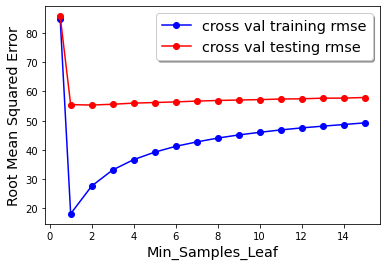

In [93]:
leaf_range = [0.5,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in leaf_range:
    rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=d, min_samples_split=2,
                          max_depth=25, n_estimators=357)
    rf.fit(Xtrain, ytrain.ravel()) 
    train_acc.append(sqrt(mean_squared_error(rf.predict(Xtrain), ytrain.ravel())))
    test_acc.append(sqrt(mean_squared_error(rf.predict(Xtest), ytest.ravel())))
    
    results  = cross_validate(rf, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))


plt.plot(leaf_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(leaf_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('min_samples_leaf', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

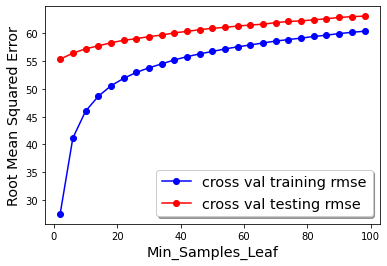

In [94]:
leaf_range = range(2,100,4)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in leaf_range:
    rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=d, min_samples_split=2,
                          max_depth=25, n_estimators=357)
    rf.fit(Xtrain, ytrain.ravel()) 
    train_acc.append(sqrt(mean_squared_error(rf.predict(Xtrain), ytrain.ravel())))
    test_acc.append(sqrt(mean_squared_error(rf.predict(Xtest), ytest.ravel())))
    
    results  = cross_validate(rf, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(leaf_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(leaf_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('min_samples_leaf', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [107]:
# Evaluate the Model using K-folds Cross validation
# Create Random Forest Model
rf_reg = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=50, min_samples_split=2,
                          max_depth=25, n_estimators=357)
rf_reg.fit(Xtrain, ytrain.ravel()) 
results  = (cross_validate(rf_reg, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                           return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-57.59544953 -56.71009295 -56.70527164 -56.05873936 -56.37962007]
test_score:  [-55.61174192 -60.9325097  -60.79889071 -63.99146133 -62.87094204]
cross val training root mean squared error (RMSE) is: 56.689834711326924
cross val testing root mean squared error (RMSE) is: 60.84110913893234


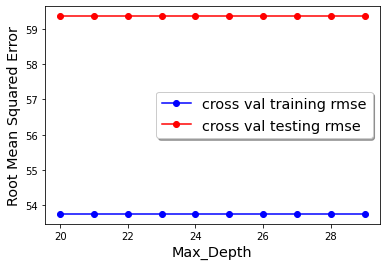

In [100]:
depth_range = range(20,30)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=30, min_samples_split=2,
                          max_depth=d, n_estimators=357)
    rf.fit(Xtrain, ytrain.ravel()) 
    train_acc.append(sqrt(mean_squared_error(rf.predict(Xtrain), ytrain.ravel())))
    test_acc.append(sqrt(mean_squared_error(rf.predict(Xtest), ytest.ravel())))
    
    results  = cross_validate(rf, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

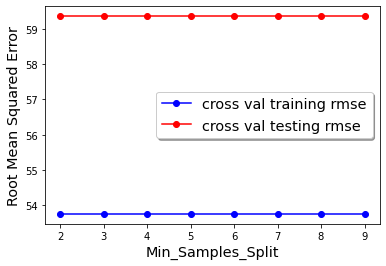

In [102]:
split_range = range(2,10)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in split_range:
    rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=30, min_samples_split=d,
                          max_depth=25, n_estimators=357)
    rf.fit(Xtrain, ytrain.ravel()) 
    train_acc.append(sqrt(mean_squared_error(rf.predict(Xtrain), ytrain.ravel())))
    test_acc.append(sqrt(mean_squared_error(rf.predict(Xtest), ytest.ravel())))
    
    results  = cross_validate(rf, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))


plt.plot(split_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(split_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('min_samples_split', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [108]:
# Evaluate the Model using K-folds Cross validation
# Create Random Forest Model
rf_reg = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=50, min_samples_split=2,
                          max_depth=25, n_estimators=357)
rf_reg.fit(Xtrain, ytrain.ravel()) 
results  = (cross_validate(rf_reg, Xdata, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                           return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-57.59544953 -56.71009295 -56.70527164 -56.05873936 -56.37962007]
test_score:  [-55.61174192 -60.9325097  -60.79889071 -63.99146133 -62.87094204]
cross val training root mean squared error (RMSE) is: 56.689834711326924
cross val testing root mean squared error (RMSE) is: 60.84110913893234


In [109]:
pd.concat((pd.DataFrame(Xtrain.columns, columns = ['feature']), 
           pd.DataFrame(rf_reg.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
3,room_type,0.619165
8,calculated_host_listings_count,0.113289
9,availability_365,0.057820
1,latitude,0.056740
2,longitude,0.056336
4,minimum_nights,0.042839
0,neighbourhood,0.018864
7,reviews_per_month,0.012624
5,number_of_reviews,0.012364
6,last_review,0.009959


In [110]:
Xdata5 = df_list.drop(['price','last_review','number_of_reviews','reviews_per_month','neighbourhood'], axis = 1)

In [111]:
Xtrain5, Xtest5, ytrain5, ytest5 = train_test_split(Xdata5, ydata, test_size=0.3, random_state=2)

In [112]:
# Evaluate the Model using K-folds Cross validation
# Create Random Forest Model
rf_reg = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=50, min_samples_split=2,
                          max_depth=25, n_estimators=357)
rf_reg.fit(Xtrain5, ytrain5.ravel()) 
results  = (cross_validate(rf_reg, Xdata5, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                           return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-57.36440464 -56.74109472 -56.81314236 -56.03682467 -56.53025585]
test_score:  [-55.54760952 -60.26241507 -60.84094024 -63.85668642 -62.56403236]
cross val training root mean squared error (RMSE) is: 56.69714444841834
cross val testing root mean squared error (RMSE) is: 60.6143367218275


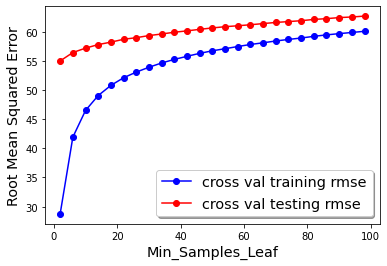

In [113]:
leaf_range = range(2,100,4)

train_acc = []
test_acc = []
cross_val_train =[]
cross_val_test =[]

for d in leaf_range:
    rf = RandomForestRegressor(random_state = 2, n_jobs=-1, max_features='log2', min_samples_leaf=d, min_samples_split=2,
                          max_depth=25, n_estimators=357)
    rf.fit(Xtrain5, ytrain5.ravel()) 
    train_acc.append(sqrt(mean_squared_error(rf.predict(Xtrain5), ytrain5.ravel())))
    test_acc.append(sqrt(mean_squared_error(rf.predict(Xtest5), ytest5.ravel())))
    
    results  = cross_validate(rf, Xdata5, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                              return_train_score = True)
    cross_val_train.append(-sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(-sum(results['test_score'])/len(results['test_score']))

plt.plot(leaf_range, cross_val_train, 'bo-', label ='cross val training rmse')
plt.plot(leaf_range, cross_val_test, 'ro-', label = 'cross val testing rmse')

plt.xlabel('min_samples_leaf', fontsize='x-large')
plt.ylabel('Root Mean Squared Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [115]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, min_samples_leaf=46)

param_grid = {"n_estimators": [350,400,450],
              "max_depth": [10, 15, 20], 
              "min_samples_split": [1, 5 ,10],
              "max_features": ["auto" "sqrt", "log2",None]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain5, ytrain5)
print(gs.best_score_)
print(gs.best_params_)

-58.75941767797887
{'max_depth': 15, 'max_features': None, 'min_samples_split': 5, 'n_estimators': 450}


In [116]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, min_samples_leaf=46, max_features=None)

param_grid = {"n_estimators": [400,450,500],
              "max_depth": [13,15,17], 
              "min_samples_split": [3,5,7]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain5, ytrain5)
print(gs.best_score_)
print(gs.best_params_)

-58.75371185133092
{'max_depth': 13, 'min_samples_split': 3, 'n_estimators': 500}


In [117]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, min_samples_leaf=46, max_features=None)

param_grid = {"n_estimators": [500,600,700],
              "max_depth": [12,13,14], 
              "min_samples_split": [2,3,4]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain5, ytrain5)
print(gs.best_score_)
print(gs.best_params_)

-58.752992857247285
{'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 700}


In [118]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, min_samples_leaf=46, max_features=None, max_depth=13,
                          min_samples_split=2)

param_grid = {"n_estimators": [700,800,900,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain5, ytrain5)
print(gs.best_score_)
print(gs.best_params_)

-58.752992857247285
{'n_estimators': 700}


In [119]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, min_samples_leaf=46, max_features=None, max_depth=13,
                          min_samples_split=2)

param_grid = {"n_estimators": [600,650,700,750,800]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain5, ytrain5)
print(gs.best_score_)
print(gs.best_params_)

-58.75030252454371
{'n_estimators': 650}


In [120]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, min_samples_leaf=46, max_features=None, max_depth=13,
                          min_samples_split=2)

param_grid = {"n_estimators": [630,640,650,660,670]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain5, ytrain5)
print(gs.best_score_)
print(gs.best_params_)

-58.74971636258427
{'n_estimators': 630}


In [121]:
rf = RandomForestRegressor(random_state = 2, n_jobs=-1, min_samples_leaf=46, max_features=None, max_depth=13,
                          min_samples_split=2)

param_grid = {"n_estimators": [610,620,630,640]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(Xtrain5, ytrain5)
print(gs.best_score_)
print(gs.best_params_)

-58.74971636258427
{'n_estimators': 630}


In [122]:
# Evaluate the Model using K-folds Cross validation
# Create Random Forest Model
rf_reg = RandomForestRegressor(random_state = 2, n_jobs=-1, min_samples_leaf=46, max_features=None, max_depth=13,
                          min_samples_split=2, n_estimators=630)
rf_reg.fit(Xtrain5, ytrain5.ravel()) 
results  = (cross_validate(rf_reg, Xdata5, ydata.ravel(), scoring='neg_root_mean_squared_error', cv=5, 
                           return_train_score = True))
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root mean squared error (RMSE) is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root mean squared error (RMSE) is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-55.88189255 -54.65753867 -54.73398958 -53.72308567 -54.50305629]
test_score:  [-56.21011378 -58.47248742 -59.97960625 -63.7267171  -60.45350508]
cross val training root mean squared error (RMSE) is: 54.699912553698574
cross val testing root mean squared error (RMSE) is: 59.76848592562618
